# 5.3.3 k-Fold Cross-Validation

In [1]:
library(ISLR2)
library(boot)

We use the `cv.glm()` function to do _k_-fold CV.

In [2]:
set.seed(17)
cv.error.10 <- rep(0, 10)
for (i in 1:10) {
    glm.fit <- glm(mpg ~ poly(horsepower, i), data = Auto)
    cv.error.10[i] <- cv.glm(Auto, glm.fit, K = 10)$delta[1]
}
cv.error.10

[1] 24.27207 19.26909 19.34805 19.29496 19.03198 18.89781 19.12061 19.14666
 [9] 18.87013 20.95520

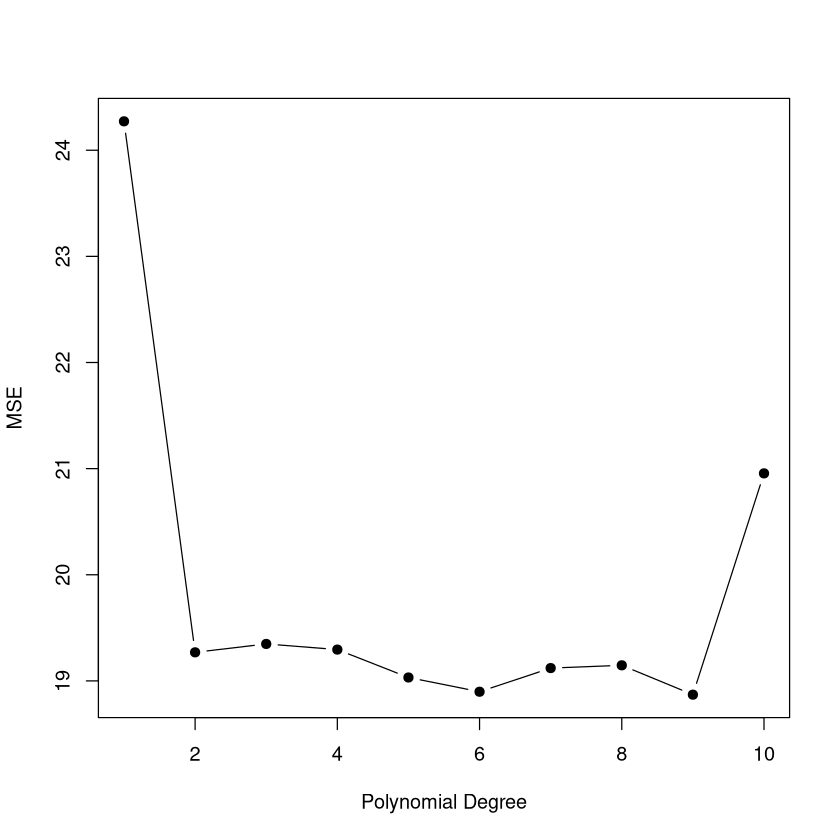

In [3]:
plot(cv.error.10, xlab = "Polynomial Degree", ylab = "MSE", pch = 19, type = "b")

Notice that the computation time is shorter than that of LOOCV. (In principle, the computation time for LOOCV for a least squares linear model should be faster than for _k_-fold CV, due to the availability of the formula (5.2) for LOOCV; however, unfortuantely the `cv.glm()` function does not make use of this formula.
\begin{align}\tag{5.2}
\text{CV}_{(n)} = \frac{1}{n} \sum^n_{i=1} \left( \frac{y_i - \hat{y}_i}{1 - h_i} \right)^2
\end{align}

In Section 5.3.2, the two numbers associated with `delta` are essentially the same when LOOCV is performed. When we instead perform _k_-fold CV, then the two numbers associated with the `delta` differ slightly. The first is the standard _k_-fold CV estimate, as in (5.3)
\begin{align}\tag{5.3}
\text{CV}_{(k)} = \frac{1}{k} \sum^k_{i=1} \text{MSE}_i \text{.}
\end{align}
The second is a bias-corrected version. On this data set the two estimates are very similar to each other.